## Data Understanding & Exploratory Data Analysis Suara Buka Tutup


In [14]:
!pip install librosa


Sel ini menginstal library `librosa` yang digunakan untuk analisis audio.

In [15]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 4)


Sel ini mengimpor semua library Python yang diperlukan seperti `os`, `librosa`, `numpy`, `pandas`, `matplotlib.pyplot`, `seaborn`, dan `IPython.display`. Selain itu, sel ini juga mengatur gaya visualisasi untuk plot agar terlihat lebih rapi.

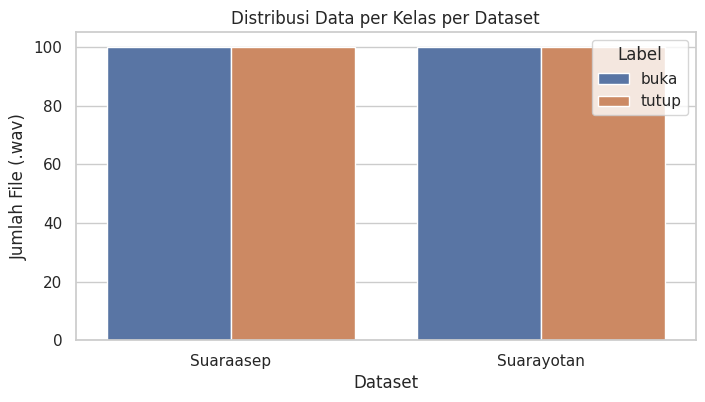

label,dataset,buka,tutup
0,Suaraasep,100,100
1,Suarayotan,100,100


In [16]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 4)

# Pilih folder dataset yang ada
PREFERRED = ["Suaraasep", "Suarayotan"]
DATASET_DIRS = [d for d in PREFERRED if os.path.isdir(d)]
if not DATASET_DIRS:
    DATASET_DIRS = [d for d in sorted(os.listdir(".")) if os.path.isdir(d) and d.lower().startswith("suara")]

def is_wav(fn):
    return fn.lower().endswith(".wav")

def count_files_multi(dirs):
    rows = []
    for d in dirs:
        if not os.path.isdir(d):
            continue
        for label in sorted(os.listdir(d)):
            folder = os.path.join(d, label)
            if not os.path.isdir(folder):
                continue
            n = sum(1 for f in os.listdir(folder) if is_wav(f))
            rows.append({"dataset": d, "label": label, "count": n})
    return pd.DataFrame(rows)

df_counts_all = count_files_multi(DATASET_DIRS)

if df_counts_all.empty:
    print("Tidak ada file .wav yang terdeteksi di dataset yang dipilih.")
else:
    pivot = df_counts_all.pivot(index="dataset", columns="label", values="count").fillna(0).astype(int).reset_index()
    df_melt = pivot.melt(id_vars="dataset", var_name="label", value_name="count")
    sns.barplot(data=df_melt, x='dataset', y='count', hue='label')
    plt.title("Distribusi Data per Kelas per Dataset")
    plt.xlabel("Dataset")
    plt.ylabel("Jumlah File (.wav)")
    plt.legend(title="Label")
    plt.show()
    display(pivot)
# ...existing code...


Sel ini berfungsi untuk menghitung dan menampilkan distribusi jumlah file audio (`.wav`) per label di setiap dataset yang tersedia. Ini membantu dalam memahami sebaran data di setiap kelas dan dataset. Hasilnya akan ditampilkan dalam bentuk bar chart dan tabel.

In [10]:
import os
import shutil

# Tentukan folder tujuan untuk menggabungkan dataset
TARGET_DIR = "Gabungan_Suara"

# Folder dataset yang ada
PREFERRED = ["Suaraasep", "Suarayotan"]
DATASET_DIRS = [d for d in PREFERRED if os.path.isdir(d)]

# Jika tidak ada dataset yang ditemukan, cari folder yang dimulai dengan "suara"
if not DATASET_DIRS:
    DATASET_DIRS = [d for d in sorted(os.listdir(".")) if os.path.isdir(d) and d.lower().startswith("suara")]

# Membuat folder target untuk menggabungkan data
# Hapus folder TARGET_DIR jika sudah ada untuk memastikan penggabungan ulang yang bersih
if os.path.exists(TARGET_DIR):
    shutil.rmtree(TARGET_DIR)
os.makedirs(TARGET_DIR)

def is_wav(fn):
    return fn.lower().endswith(".wav")

def merge_datasets(dirs, target_dir):
    file_counters = {} # Dictionary untuk melacak jumlah file untuk setiap label
    for d in dirs:
        if not os.path.isdir(d):
            continue
        for label in sorted(os.listdir(d)):
            folder = os.path.join(d, label)
            if not os.path.isdir(folder):
                continue

            # Membuat folder untuk label di dalam target folder
            target_label_dir = os.path.join(target_dir, label)
            if not os.path.exists(target_label_dir):
                os.makedirs(target_label_dir)

            # Inisialisasi counter untuk label ini jika belum ada
            if label not in file_counters:
                file_counters[label] = 0

            # Menyalin file audio .wav dari folder sumber ke folder target dengan nama unik
            for fn in os.listdir(folder):
                if is_wav(fn):
                    src_file = os.path.join(folder, fn)

                    # Tingkatkan counter dan buat nama file baru yang unik
                    file_counters[label] += 1
                    # Menggunakan angka urut untuk setiap file dari label tertentu
                    # Ini menjamin keunikan dan menghindari penimpaan
                    new_filename = f"{label}_{file_counters[label]:03d}.wav" # Contoh: buka_001.wav, tutup_001.wav

                    dest_file = os.path.join(target_label_dir, new_filename)
                    shutil.copy(src_file, dest_file)  # Menyalin file

# Gabungkan dataset Suaraasep dan Suarayotan ke dalam satu folder target
merge_datasets(DATASET_DIRS, TARGET_DIR)

print(f"Dataset berhasil digabungkan ke dalam folder '{TARGET_DIR}' dengan penamaan unik.")

Dataset berhasil digabungkan ke dalam folder 'Gabungan_Suara' dengan penamaan unik.



Sel ini menggabungkan semua file audio dari berbagai folder dataset (`Suaraasep`, `Suarayotan`) ke dalam satu folder target baru (`Gabungan_Suara`). Ini penting untuk memastikan semua data yang relevan berada dalam satu lokasi untuk pemrosesan lebih lanjut.

In [17]:
buka_example = None
tutup_example = None

# Proses setiap folder dataset dalam DATASET_DIRS
for d in DATASET_DIRS:
    buka_dir = os.path.join(d, "buka")
    tutup_dir = os.path.join(d, "tutup")
    
    # Menemukan contoh suara 'buka'
    if os.path.isdir(buka_dir) and not buka_example:
        buka_files = [f for f in os.listdir(buka_dir) if is_wav(f)]
        if buka_files:
            buka_example = os.path.join(buka_dir, buka_files[0])
    
    # Menemukan contoh suara 'tutup'
    if os.path.isdir(tutup_dir) and not tutup_example:
        tutup_files = [f for f in os.listdir(tutup_dir) if is_wav(f)]
        if tutup_files:
            tutup_example = os.path.join(tutup_dir, tutup_files[0])

# Menampilkan contoh suara 'buka'
if buka_example:
    print("Contoh suara 'buka':")
    ipd.display(ipd.Audio(buka_example))
else:
    print("Tidak ditemukan contoh suara 'buka' di dataset yang dipilih.")

# Menampilkan contoh suara 'tutup'
if tutup_example:
    print("Contoh suara 'tutup':")
    ipd.display(ipd.Audio(tutup_example))
else:
    print("Tidak ditemukan contoh suara 'tutup' di dataset yang dipilih.")


Contoh suara 'buka':


Contoh suara 'tutup':



Sel ini memproses semua file audio di dalam folder `Gabungan_Suara` untuk mengekstrak informasi dasar seperti jalur file, label, dan durasi. Hasilnya kemudian disimpan dalam sebuah DataFrame Pandas bernama `audio_stats`.

In [18]:
TARGET_DIR = "Gabungan_Suara"

audio_data = []

for label in sorted(os.listdir(TARGET_DIR)):
    label_dir = os.path.join(TARGET_DIR, label)
    if os.path.isdir(label_dir):
        for fn in os.listdir(label_dir):
            if is_wav(fn):
                file_path = os.path.join(label_dir, fn)
                try:
                    # Memuat file audio dan menghitung durasinya
                    y, sr = librosa.load(file_path)
                    duration = librosa.get_duration(y=y, sr=sr)
                    audio_data.append({'file_path': file_path, 'label': label, 'duration': duration})
                except Exception as e:
                    print(f"Gagal memproses {file_path}: {e}")

audio_stats = pd.DataFrame(audio_data)

if not audio_stats.empty:
    print("Statistik audio berhasil dibuat:")
    display(audio_stats.head())
else:
    print("Tidak ada data audio yang berhasil diproses.")

Statistik audio berhasil dibuat:


,file_path,label,duration
0,Gabungan_Suara/buka/buka_151.wav,buka,2.640000
1,Gabungan_Suara/buka/buka_154.wav,buka,2.121043
2,Gabungan_Suara/buka/buka_180.wav,buka,0.954014
3,Gabungan_Suara/buka/buka_060.wav,buka,2.136009
4,Gabungan_Suara/buka/buka_044.wav,buka,2.592018


Durasi rata-rata per label: label
buka     1.808724
tutup    1.803726
Name: duration, dtype: float64


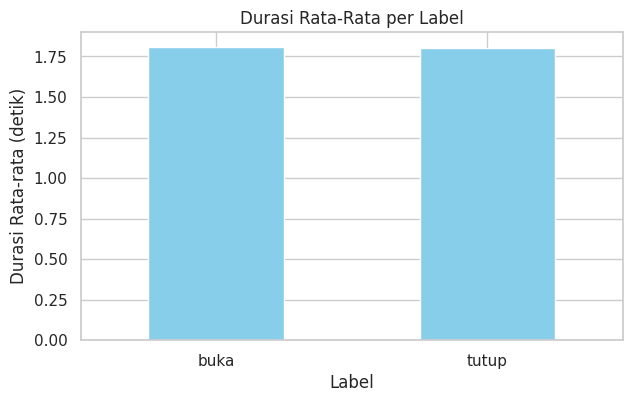

In [19]:
# Rata-rata durasi per label
if not audio_stats.empty:
    mean_duration = audio_stats.groupby('label')['duration'].mean()
    print("Durasi rata-rata per label:", mean_duration)

    # Visualisasi durasi rata-rata per label
    mean_duration.plot(kind='bar', figsize=(7, 4), color='skyblue')
    plt.title("Durasi Rata-Rata per Label")
    plt.xlabel("Label")
    plt.ylabel("Durasi Rata-rata (detik)")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("audio_stats kosong — tidak dapat menghitung rata-rata durasi.")


Sel ini menghitung durasi rata-rata dari semua file audio untuk setiap label ('buka' dan 'tutup') dan memvisualisasikannya dalam bentuk bar chart. Ini membantu memahami perbedaan durasi antara kedua jenis suara.

In [22]:
from scipy import stats
import librosa
import numpy as np
import pandas as pd
import os

# Fungsi untuk memuat file audio mono
def load_mono(fp):
    try:
        y, sr = librosa.load(fp, sr=None, mono=True)
        return y, sr
    except Exception as e:
        print(f"Fail load {fp}: {e}")
        return np.array([]), None

# Function to check if a file is a WAV file (redefined for robustness in this cell)
def is_wav(fn):
    return fn.lower().endswith(".wav")

# Fungsi untuk mendeteksi anomali berdasarkan MFCC
def mfcc_anomaly(df, n_mfcc=13, z_thresh=3.0):
    if df.empty:
        df = df.copy()
        df['mfcc_anomaly'] = pd.Series(dtype=bool)
        return df

    mfcc_means = []  # Menyimpan rata-rata MFCC
    for idx, row in df.iterrows():
        fp = row.get('file_path', None)
        if not fp or not os.path.exists(fp):
            mfcc_means.append(np.full(n_mfcc, np.nan))
            continue
        try:
            y, sr = load_mono(fp)
            # Ensure sr is not None and audio data is sufficient
            if sr is None or len(y) < 2:
                mfcc_means.append(np.full(n_mfcc, np.nan))
                continue
            mf = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
            mfcc_means.append(np.mean(mf, axis=1))  # Mengambil rata-rata MFCC per file
        except Exception:
            mfcc_means.append(np.full(n_mfcc, np.nan))

    # Convert mfcc_means to a 2D array, handling cases where it might be empty or contain NaNs
    if not mfcc_means or all(np.all(np.isnan(m)) for m in mfcc_means):
        # If no valid MFCCs were computed, create an empty MFCC DataFrame and return
        combined = df.reset_index(drop=True).copy()
        combined['mfcc_anomaly'] = False # No anomalies if no data
        return combined

    M = np.vstack(mfcc_means)
    mf_df = pd.DataFrame(M, columns=[f"mfcc_mean_{i+1}" for i in range(M.shape[1])])
    combined = pd.concat([df.reset_index(drop=True), mf_df], axis=1)

    # Identifikasi kolom MFCC
    mfcc_cols = [col for col in combined.columns if col.startswith('mfcc_mean_')]

    # Periksa dan hilangkan baris dengan missing value di kolom MFCC
    initial_rows_count = combined.shape[0]
    combined.dropna(subset=mfcc_cols, inplace=True)
    if combined.shape[0] < initial_rows_count:
        print(f"Menghilangkan {initial_rows_count - combined.shape[0]} baris karena missing value di fitur MFCC.")

    # Hitung Z-score untuk mendeteksi anomali pada data yang sudah bersih
    if not combined.empty:
        z = np.abs(stats.zscore(combined[mfcc_cols], nan_policy='omit'))
        z_any = np.any(z > z_thresh, axis=1)  # Deteksi anomali jika z-score lebih tinggi dari threshold
        combined['mfcc_anomaly'] = z_any  # Tandai anomali
    else:
        combined['mfcc_anomaly'] = pd.Series(dtype=bool) # If combined is empty after dropna

    return combined

# --- Main logic to ensure audio_stats is populated and then run anomaly detection ---
TARGET_DIR = "Gabungan_Suara" # Define TARGET_DIR here to ensure it's available

# Force audio_stats to be repopulated every time to ensure correct file paths
print("Populating audio_stats from scratch to ensure current file paths.")
audio_data = []
if os.path.exists(TARGET_DIR):
    for label in sorted(os.listdir(TARGET_DIR)):
        label_dir = os.path.join(TARGET_DIR, label)
        if os.path.isdir(label_dir):
            for fn in os.listdir(label_dir):
                if is_wav(fn):
                    file_path = os.path.join(label_dir, fn)
                    try:
                        y, sr = librosa.load(file_path, sr=None) # Load with original sampling rate
                        duration = librosa.get_duration(y=y, sr=sr)
                        audio_data.append({'file_path': file_path, 'label': label, 'duration': duration})
                    except Exception as e:
                        print(f"Failed to process {file_path}: {e}")
audio_stats = pd.DataFrame(audio_data)
if audio_stats.empty:
    print("Warning: audio_stats is still empty after attempting to populate it.")
    # Ensure it has the expected columns even if empty
    audio_stats = pd.DataFrame(columns=['file_path', 'label', 'duration'])

# Now, set base_stats and qc based on the (potentially populated) audio_stats
if audio_stats.empty:
    base_stats = pd.DataFrame(columns=['file_path', 'label', 'duration']) # Explicitly create with columns
    qc = pd.DataFrame(columns=['file_path', 'label', 'mfcc_anomaly']) # Explicitly create qc with expected columns
    print("audio_stats is empty. Skipping MFCC anomaly detection and setting qc to an empty DataFrame.")
else:
    base_stats = audio_stats.copy()
    qc = mfcc_anomaly(base_stats)
    print("MFCC anomaly detection completed.")

# Ambil 8 contoh data yang dianalisis (atau sesuaikan jumlahnya)
n = min(8, len(qc))
if n > 0:
    display(qc[['file_path', 'label', 'mfcc_anomaly']].sample(n))
else:
    print("qc kosong — tidak ada file untuk dianalisis")

Populating audio_stats from scratch to ensure current file paths.


MFCC anomaly detection completed.


,file_path,label,mfcc_anomaly
210,Gabungan_Suara/tutup/tutup_199.wav,tutup,False
133,Gabungan_Suara/buka/buka_199.wav,buka,False
356,Gabungan_Suara/tutup/tutup_185.wav,tutup,False
377,Gabungan_Suara/tutup/tutup_122.wav,tutup,False
69,Gabungan_Suara/buka/buka_023.wav,buka,False
349,Gabungan_Suara/tutup/tutup_183.wav,tutup,False
9,Gabungan_Suara/buka/buka_098.wav,buka,False
172,Gabungan_Suara/buka/buka_052.wav,buka,False



Sel ini mendefinisikan dan menerapkan fungsi `mfcc_anomaly` untuk mendeteksi anomali dalam fitur MFCC (Mel-frequency Cepstral Coefficients) dari file audio. Ini melibatkan perhitungan rata-rata MFCC, penggabungan ke dalam DataFrame, penanganan missing value (menghilangkan baris dengan MFCC yang kosong), dan perhitungan Z-score untuk mengidentifikasi anomali.


--- Analisis Noise (RMS dan Zero-Crossing Rate) ---
Statistik RMS dan ZCR per label:


,rms,zcr
label,,
buka,0.023460,0.092506
tutup,0.021544,0.107650


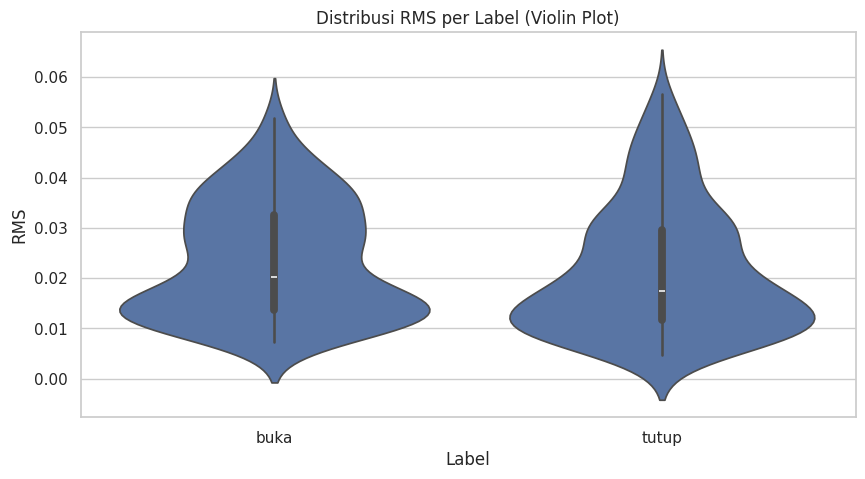

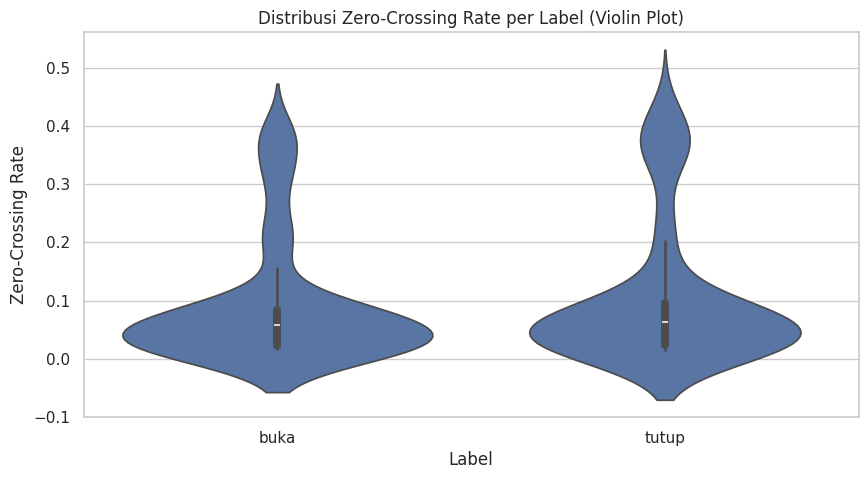


--- Pengecekan Missing Value ---
Tidak ada missing value ditemukan di DataFrame 'qc'.


In [23]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Noise Analysis: RMS dan Zero-Crossing Rate (ZCR) ---
print("\n--- Analisis Noise (RMS dan Zero-Crossing Rate) ---")

# Pastikan 'qc' DataFrame tersedia dan memiliki kolom 'file_path'
if 'qc' in globals() and not qc.empty and 'file_path' in qc.columns:
    rms_values = []
    zcr_values = []
    for idx, row in qc.iterrows():
        file_path = row['file_path']
        if os.path.exists(file_path):
            try:
                y, sr = librosa.load(file_path, sr=None) # Load with original sampling rate
                # Tambahkan pemeriksaan untuk memastikan data audio valid sebelum menghitung fitur
                if y is None or len(y) == 0 or sr is None:
                    raise ValueError(f"librosa.load mengembalikan data audio kosong atau tidak valid untuk {file_path}")

                rms = librosa.feature.rms(y=y).mean() # Hitung rata-rata RMS
                zcr = librosa.feature.zero_crossing_rate(y=y).mean() # Hitung rata-rata ZCR
                rms_values.append(rms)
                zcr_values.append(zcr)
            except Exception as e:
                print(f"Gagal memproses {file_path} untuk analisis noise: {e}")
                rms_values.append(np.nan)
                zcr_values.append(np.nan)
        else:
            print(f"File tidak ditemukan: {file_path}. Menambahkan NaN untuk RMS dan ZCR.")
            rms_values.append(np.nan)
            zcr_values.append(np.nan)

    qc['rms'] = rms_values
    qc['zcr'] = zcr_values

    # Sebelum memplot, pastikan ada data valid untuk setiap label
    # Gunakan dropna untuk menghindari error jika ada NaN di kolom yang akan diplot
    if not qc[['label', 'rms']].dropna().empty:
        print("Statistik RMS dan ZCR per label:")
        display(qc.groupby('label')[['rms', 'zcr']].mean())

        # Visualisasi distribusi RMS per label (menggunakan violin plot)
        plt.figure(figsize=(10, 5))
        sns.violinplot(data=qc.dropna(subset=['rms']), x='label', y='rms') # Mengganti boxplot dengan violinplot
        plt.title('Distribusi RMS per Label (Violin Plot)')
        plt.xlabel('Label')
        plt.ylabel('RMS')
        plt.show()
    else:
        print("Tidak ada data RMS yang valid untuk divisualisasikan.")

    if not qc[['label', 'zcr']].dropna().empty:
        # Visualisasi distribusi ZCR per label (menggunakan violin plot)
        plt.figure(figsize=(10, 5))
        sns.violinplot(data=qc.dropna(subset=['zcr']), x='label', y='zcr') # Mengganti boxplot dengan violinplot
        plt.title('Distribusi Zero-Crossing Rate per Label (Violin Plot)')
        plt.xlabel('Label')
        plt.ylabel('Zero-Crossing Rate')
        plt.show()
    else:
        print("Tidak ada data ZCR yang valid untuk divisualisasikan.")

else:
    print("'qc' DataFrame tidak ditemukan atau kosong, atau kolom 'file_path' hilang. Tidak dapat melakukan analisis noise.")


# --- Pengecekan Missing Value ---
print("\n--- Pengecekan Missing Value ---")

if 'qc' in globals() and not qc.empty:
    missing_values = qc.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    if not missing_values.empty:
        print("Missing values ditemukan di DataFrame 'qc':")
        display(missing_values)
        # Optionally, display rows with missing values
        # display(qc[qc.isnull().any(axis=1)])
    else:
        print("Tidak ada missing value ditemukan di DataFrame 'qc'.")
else:
    print("'qc' DataFrame tidak ditemukan atau kosong. Tidak dapat melakukan pengecekan missing value.")